In [2]:
from PIL import Image
from glob import glob
import numpy as np
import cv2
import matplotlib.cm as cm
import matplotlib.pyplot as plt

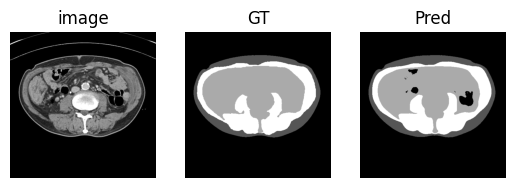

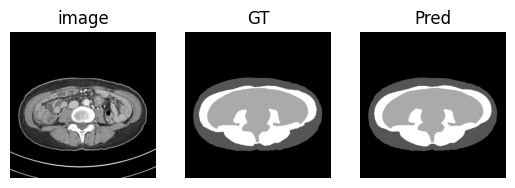

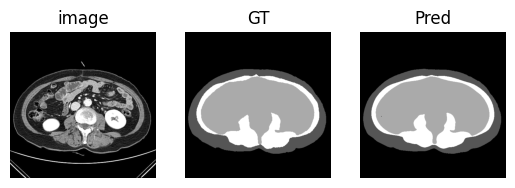

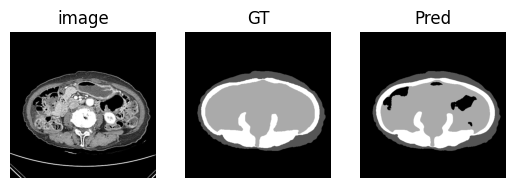

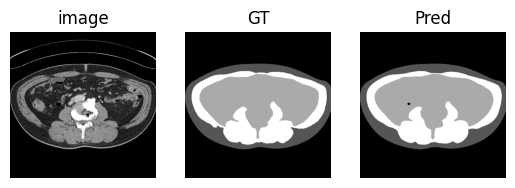

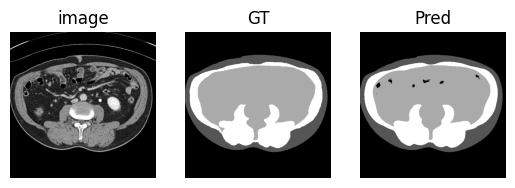

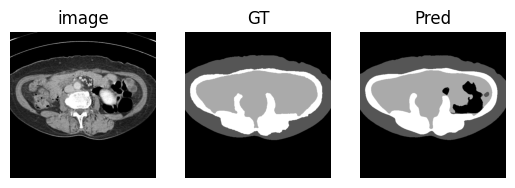

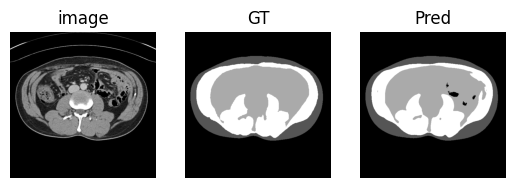

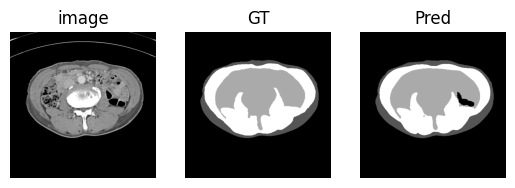

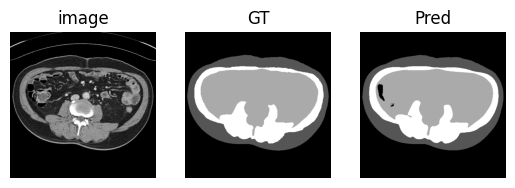

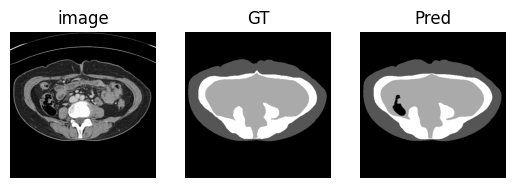

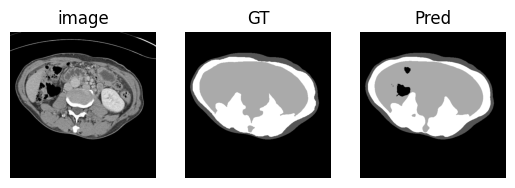

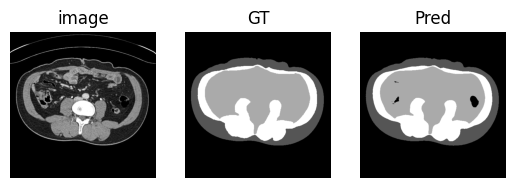

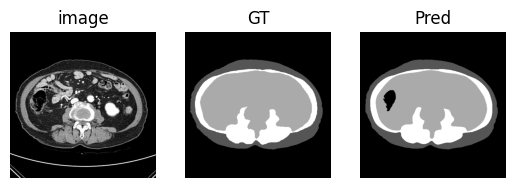

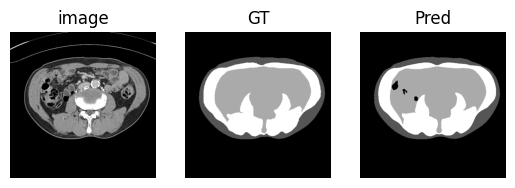

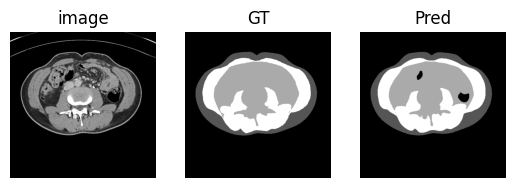

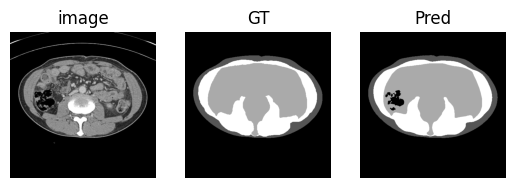

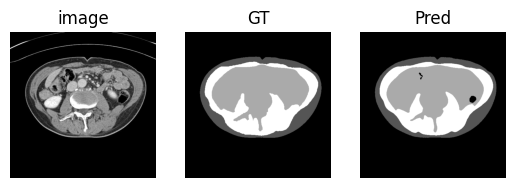

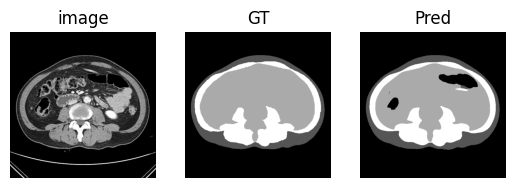

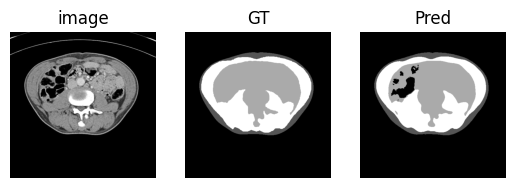

In [4]:
pred_mask_home=r'C:\Users\qwe14\0.code\nnUNet\nnUNet_results\Dataset121_MR\nnUNetTrainer__nnUNetPlans__2d\fold_5\test'
gt_mask_home=r"C:\Users\qwe14\0.code\nnUNet\nnUNet_raw\Dataset121_MR\labelsTs"
gt_img_home=r"C:\Users\qwe14\0.code\nnUNet\nnUNet_raw\Dataset121_MR\imagesTs"

pred_mask_paths = glob(f"{pred_mask_home}\*.png")
gt_mask_paths = glob(f"{gt_mask_home}\*.png")
gt_img_paths = glob(f"{gt_img_home}\*.png")

idx = 0
for pmp, gmp, gip in zip(pred_mask_paths, gt_mask_paths, gt_img_paths):
    idx+=1
    pm_mask = cv2.imread(pmp, cv2.IMREAD_GRAYSCALE)
    gm_mask = cv2.imread(gmp, cv2.IMREAD_GRAYSCALE)
    gt_image = cv2.imread(gip, cv2.IMREAD_GRAYSCALE)
    plt.subplot(1,3,1)
    plt.gca().set_title("image")
    plt.gca().axis("off")
    plt.imshow(gt_image.astype(np.float32), cmap = cm.gray)
    
    plt.subplot(1,3,2)
    plt.gca().set_title("GT")
    plt.gca().axis("off")
    plt.imshow(gm_mask.astype(np.float32), cmap = cm.gray) 

    plt.subplot(1,3,3)
    plt.gca().set_title("Pred")
    plt.gca().axis("off")
    plt.imshow(pm_mask.astype(np.float32), cmap = cm.gray)
    plt.show()
    if idx == 20:
        break

In [1]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score

In [5]:
def calculate_binary_metrics(pm_mask, gm_mask):
    f1_micro = f1_score(pm_mask.flatten(), gm_mask.flatten(), average='micro')
    f1_macro = f1_score(pm_mask.flatten(), gm_mask.flatten(), average='macro')
    accuracy = accuracy_score(pm_mask.flatten(), gm_mask.flatten())

    return f1_micro, f1_macro, accuracy
    
def calculate_iou(predicted_mask, ground_truth_mask):
    intersection = np.logical_and(predicted_mask, ground_truth_mask)
    union = np.logical_or(predicted_mask, ground_truth_mask)
    
    iou = np.sum(intersection) / np.sum(union)
    return iou

idx = 0
iou_list = []
acc_list = []
f1_macro_list = []
f1_micro_list = []
for pmp, gmp in zip(pred_mask_paths, gt_mask_paths):
    idx+=1
    pm_mask = cv2.imread(pmp, cv2.IMREAD_GRAYSCALE)
    gm_mask = cv2.imread(gmp, cv2.IMREAD_GRAYSCALE)
    iou_list.append(calculate_iou(pm_mask, gm_mask))
    f1_micro, f1_macro, acc = calculate_binary_metrics(pm_mask, gm_mask)
    acc_list.append(acc)
    f1_micro_list.append(f1_micro)
    f1_macro_list.append(f1_macro)


0.9628262044508722
0.9641467903028997
0.9737020775123879
0.9737020775123879


In [8]:
print(f"IoU: {np.mean(iou_list)}")
print(f"f1_macro score: {np.mean(f1_macro_list)}")
print(f"f1_micro score: {np.mean(f1_micro_list)}")
print(f"accuacy: {np.mean(acc_list)}")

IoU: 0.9628262044508722
f1_macro score: 0.9641467903028997
f1_micro score: 0.9737020775123879
accuacy: 0.9737020775123879


In [6]:
from sklearn.metrics import confusion_matrix
for pmp, gmp in zip(pred_mask_paths, gt_mask_paths):
    pm_mask = cv2.imread(pmp, cv2.IMREAD_GRAYSCALE)
    gm_mask = cv2.imread(gmp, cv2.IMREAD_GRAYSCALE)
    print(calculate_binary_metrics(pm_mask, gm_mask))
    pm_mask = np.array(pm_mask)
    gm_mask = np.array(gm_mask)
    print(confusion_matrix(pm_mask.flatten(), gm_mask.flatten()).ravel())
    print(confusion_matrix(pm_mask.flatten(), gm_mask.flatten()))
    print(np.sum(confusion_matrix(pm_mask.flatten(), gm_mask.flatten())))
    break

(0.9793014526367188, 0.9702889663179235, 0.9793014526367188)
[158257     66   2697      0     77  20573      0    392      0      2
  46641    733      0    553    906  31247]
[[158257     66   2697      0]
 [    77  20573      0    392]
 [     0      2  46641    733]
 [     0    553    906  31247]]
262144
